# Ensembles

mushroom dataset

Naive Bayes
Neural Network
SVC
Decision Tree

and ensembles of these

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Locate and load the data file
df = pd.read_csv("EP_datasets/mushroom_dataset.csv")

# Sanity check
print(f"#rows={len(df)}, #columns={len(df.columns)}\n")

# CHeck for nulls
print(f"null values\n", df.isnull().any())

# Check for duplicates
df["duplicate"] = df.duplicated()
print(f"\n#total= {len(df)}")

print(f"#duplicated= {len(df[df['duplicate']==True])}\n")

# Look at data types
print(f"data types\n", df.dtypes)

# Remove column duplicate
df = df.drop(columns="duplicate")

df.head()

#rows=8124, #columns=23

null values
 class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

#total= 8124
#duplicated= 0

data types
 class                       object
cap-shape                   object
cap-surface                 object
cap-color            

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


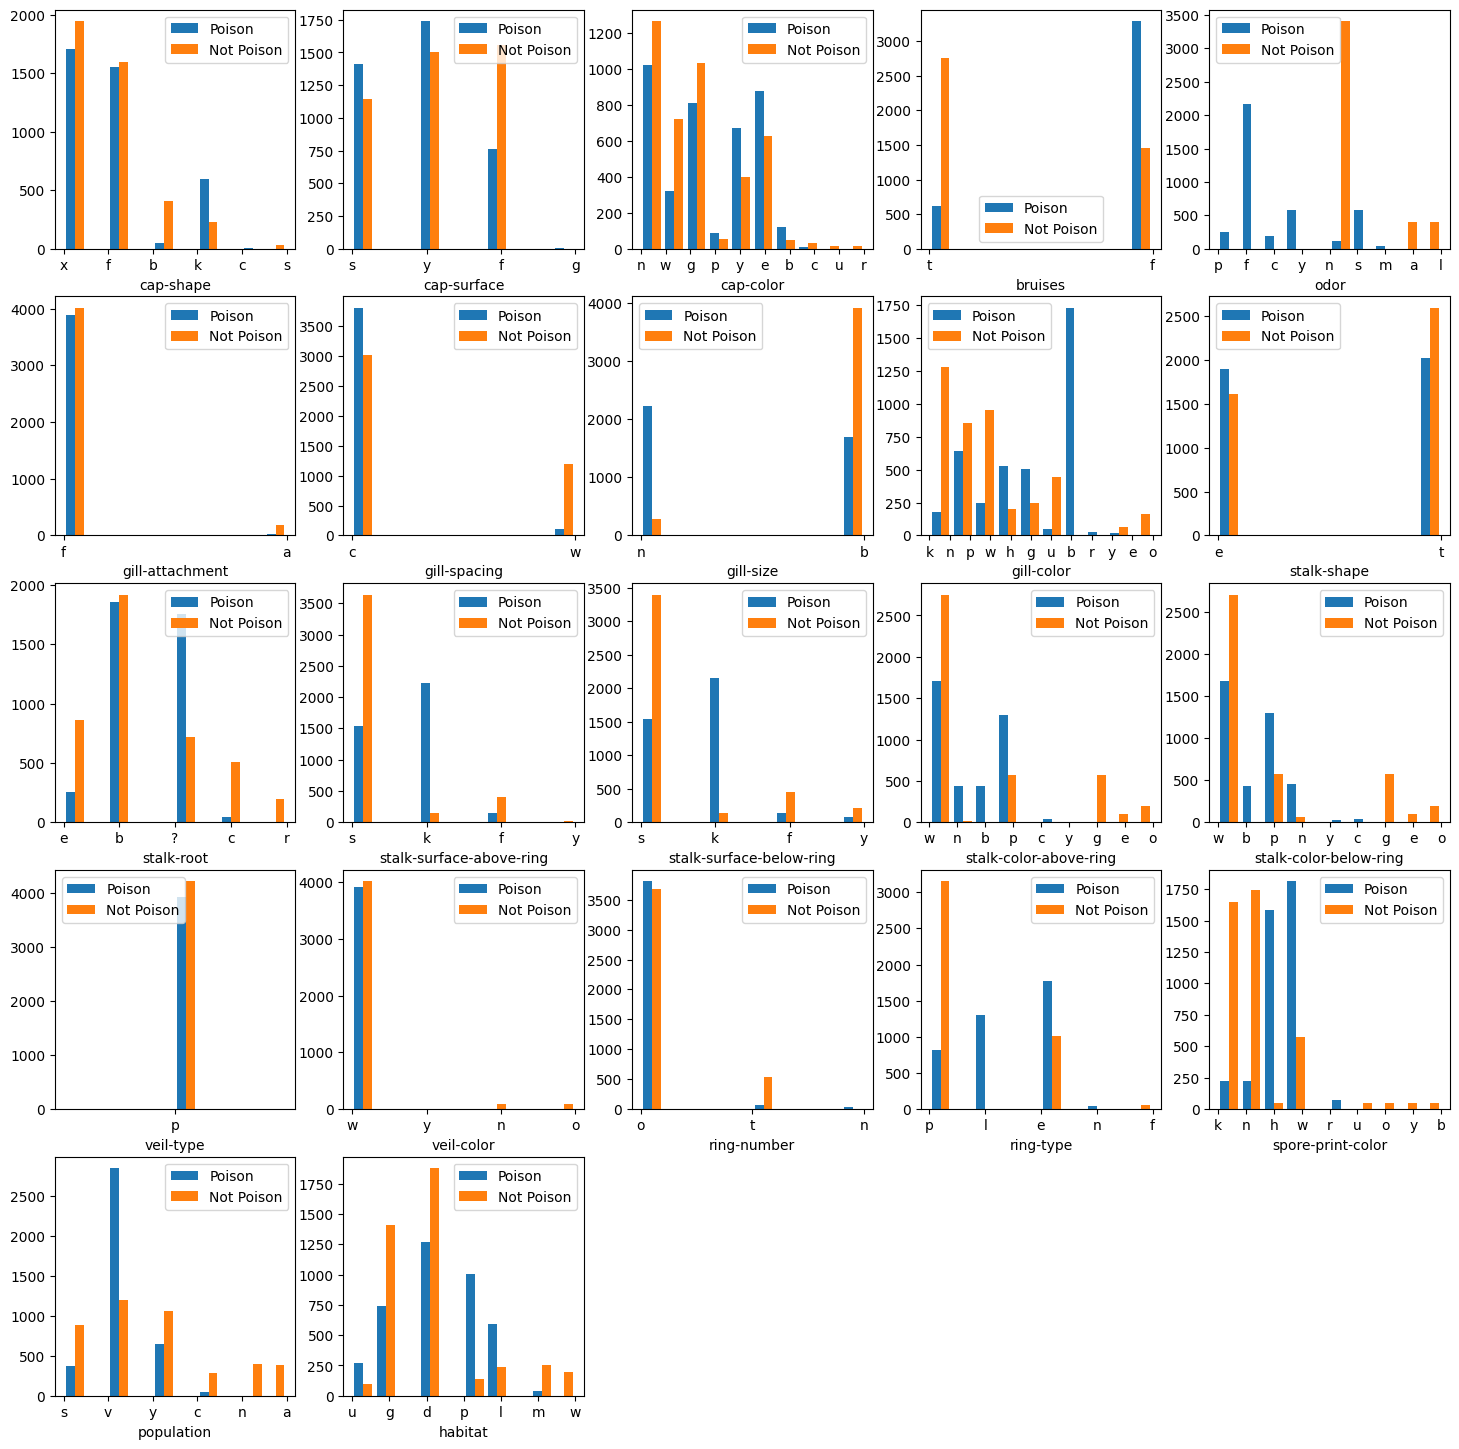

In [2]:
def plt_var(_col):
    plt.hist(
        [df[df["class"] == "p"][_col], df[df["class"] == "e"][_col]],
        label=["Poison", "Not Poison"],
    )
    plt.xlabel(_col)
    plt.legend()


plt.figure(figsize=(18, 18))

for i in range(len(df.columns) - 1):
    plt.subplot(5, 5, i + 1)
    plt_var(df.columns[i + 1])

In [3]:
df_1 = pd.get_dummies(df)
print(f"#rows={len(df_1)}, #columns={len(df_1.columns)}")
df_1.head()

#rows=8124, #columns=119


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
df_1 = df_1.drop(columns="class_e")
df_1.head()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [5]:
# Prepare X and y inputs
X = df_1.loc[:, df_1.columns != "class_p"]
y = df_1.loc[:, df_1.columns == "class_p"].values.ravel()

print(f"N={len(X)}, M={len(X.columns)}")

X = X.values

N=8124, M=117


In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 10-fold CV evaluation of a classifier


def eval_classifier(_clf, _X, _y):
    acc = []
    if _X.shape[0] < 10:
        splits = 2
    else:
        splits = 10
    kf = StratifiedKFold(n_splits=splits, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
    return np.array(acc)

In [7]:
from sklearn.naive_bayes import GaussianNB

acc = eval_classifier(GaussianNB(), X, y)
print(f"Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Naive Bayes CV accuracy=0.91 ±0.086


In [8]:
from sklearn.svm import SVC

acc = eval_classifier(SVC(kernel="linear", probability=True), X, y)
print(f"Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Linear SVC CV accuracy=0.98 ±0.047


In [9]:
from sklearn.neural_network import MLPClassifier

acc = eval_classifier(
    MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1), X, y
)
print(f"Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Neural Network CV accuracy=0.90 ±0.158


In [10]:
from sklearn.tree import DecisionTreeClassifier

acc = eval_classifier(DecisionTreeClassifier(max_depth=5, max_features=5), X, y)
print(f"Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Decision Tree CV accuracy=0.84 ±0.143


In [11]:
from sklearn.ensemble import RandomForestClassifier

acc = eval_classifier(RandomForestClassifier(), X, y)
print(f"Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Random Forest CV accuracy=0.96 ±0.094


In [12]:
def ensemble_classifiers(n_estimators):
    ensemble_NB = []
    ensemble_SVC = []
    ensemble_MLP = []
    ensemble_DT = []
    for j in range(n_estimators):
        ensemble_NB += [GaussianNB()]
        ensemble_SVC += [SVC(kernel="linear", probability=True)]
        ensemble_MLP += [
            MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1)
        ]
        ensemble_DT += [DecisionTreeClassifier(max_depth=5, max_features=5)]

    return ensemble_NB, ensemble_SVC, ensemble_MLP, ensemble_DT


ensemble_NB, ensemble_SVC, ensemble_MLP, ensemble_DT = ensemble_classifiers(50)

In [13]:
acc = eval_classifier(ensemble_NB[0], X, y)
print(f"Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")
acc = eval_classifier(ensemble_SVC[0], X, y)
print(f"Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")
acc = eval_classifier(ensemble_MLP[0], X, y)
print(f"Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")
acc = eval_classifier(ensemble_DT[0], X, y)
print(f"Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Naive Bayes CV accuracy=0.91 ±0.086
Linear SVC CV accuracy=0.98 ±0.047
Neural Network CV accuracy=0.91 ±0.157
Decision Tree CV accuracy=0.88 ±0.103


In [14]:
def ensemble_fit(_ensemble, _cols, _X, _y, ratio):
    n_estimators = len(_ensemble)

    for j in range(n_estimators):
        Xs = _X[:, _cols[j]]
        ix = sub_samples(Xs, ratio)
        Xss = Xs[ix, :]
        yss = _y[ix]
        _ensemble[j].fit(Xss, yss)

    return _ensemble

In [15]:
def ensemble_predict(_ensemble_clf, _cols, _Xtest):
    from collections import defaultdict

    n_estimators = len(_ensemble_clf)
    assert n_estimators == len(_cols)
    ypred_e, yprob_e = [], []
    for j in range(n_estimators):
        Xs = _Xtest[:, _cols[j]]
        ypred_e += [_ensemble_clf[j].predict(Xs)]
        yprob_e += [_ensemble_clf[j].predict_proba(Xs)]

    ypred = []
    ypred_prob = []
    for i in range(_Xtest.shape[0]):
        # Mojority voting using predict histogram
        ypred_scores = [0, 0]
        for j in range(n_estimators):
            if ypred_e[j][i] == 0:
                ypred_scores[0] += 1
            else:
                ypred_scores[1] += 1
        ypred += [np.argmax(ypred_scores)]

        # Majority voting using probability
        # ypred_scores = defaultdict(float)
        # for j in range(n_estimators):
        #    for c, p in enumerate(yprob_e[j][i]):
        #        ypred_scores[c] += p
        # ix = max(ypred_scores.items(), key=lambda a: a[1])
        # ypred_prob += [ix[0]]

    return np.array(ypred)

In [16]:
# Use _m features randomly selected from _M features
# a total of n_estimators many weak learners
def features_randomsubset(_M, _m, n_estimators=1):
    from numpy.random import choice

    # returns a list of list of column choices - subset features
    return [choice(_M, _m, replace=False) for _ in range(n_estimators)]

In [17]:
def eval_ensemble(_X, _y, _niter, _nfeatures, _ensemble, ratio):
    acc = []
    for i in range(_niter):
        n_estimators = len(_ensemble)
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            e_clf = ensemble_fit(
                _ensemble, cols, _X[train_index], _y[train_index], ratio
            )
            y_pred = ensemble_predict(e_clf, cols, _X[test_index])
            acc += [accuracy_score(_y[test_index], y_pred)]

    return np.array(acc)

In [18]:
# Direct correlation between each column of X and the target y
corrs = np.array([np.correlate(X[:, j], y)[0] for j in range(X.shape[1])])

# Reverse sort, numpy array negation reverses the order
ranks = np.argsort(~corrs)

# Display rankings
rankings = [(f"{corrs[j]:.1f}", df_1.columns[j + 1]) for j in ranks]
display(rankings[:])

[('1.0', 'cap-shape_b'),
 ('1.0', 'stalk-color-below-ring_p'),
 ('1.0', 'stalk-color-below-ring_n'),
 ('1.0', 'stalk-color-below-ring_c'),
 ('1.0', 'stalk-color-below-ring_b'),
 ('1.0', 'stalk-color-above-ring_y'),
 ('1.0', 'stalk-color-above-ring_w'),
 ('1.0', 'stalk-color-above-ring_p'),
 ('1.0', 'stalk-color-above-ring_n'),
 ('1.0', 'stalk-color-above-ring_c'),
 ('1.0', 'stalk-color-above-ring_b'),
 ('1.0', 'stalk-surface-below-ring_y'),
 ('1.0', 'stalk-surface-below-ring_s'),
 ('1.0', 'stalk-surface-below-ring_k'),
 ('1.0', 'stalk-surface-below-ring_f'),
 ('1.0', 'stalk-surface-above-ring_y'),
 ('1.0', 'habitat_u'),
 ('1.0', 'stalk-surface-above-ring_k'),
 ('1.0', 'stalk-surface-above-ring_f'),
 ('1.0', 'stalk-root_e'),
 ('1.0', 'stalk-root_c'),
 ('1.0', 'stalk-root_b'),
 ('1.0', 'stalk-color-below-ring_w'),
 ('1.0', 'stalk-color-below-ring_y'),
 ('1.0', 'veil-type_p'),
 ('1.0', 'veil-color_w'),
 ('1.0', 'habitat_p'),
 ('1.0', 'habitat_m'),
 ('1.0', 'habitat_l'),
 ('1.0', 'habitat_

In [19]:
delcols = [(j, f"{corrs[j]:.1f}", df_1.columns[j + 1]) for j in ranks if corrs[j] <= 2]
print(delcols)

[(0, '1.0', 'cap-shape_b'), (79, '1.0', 'stalk-color-below-ring_p'), (77, '1.0', 'stalk-color-below-ring_n'), (74, '1.0', 'stalk-color-below-ring_c'), (73, '1.0', 'stalk-color-below-ring_b'), (72, '1.0', 'stalk-color-above-ring_y'), (71, '1.0', 'stalk-color-above-ring_w'), (70, '1.0', 'stalk-color-above-ring_p'), (68, '1.0', 'stalk-color-above-ring_n'), (65, '1.0', 'stalk-color-above-ring_c'), (64, '1.0', 'stalk-color-above-ring_b'), (63, '1.0', 'stalk-surface-below-ring_y'), (62, '1.0', 'stalk-surface-below-ring_s'), (61, '1.0', 'stalk-surface-below-ring_k'), (60, '1.0', 'stalk-surface-below-ring_f'), (59, '1.0', 'stalk-surface-above-ring_y'), (115, '1.0', 'habitat_u'), (57, '1.0', 'stalk-surface-above-ring_k'), (56, '1.0', 'stalk-surface-above-ring_f'), (54, '1.0', 'stalk-root_e'), (53, '1.0', 'stalk-root_c'), (52, '1.0', 'stalk-root_b'), (80, '1.0', 'stalk-color-below-ring_w'), (81, '1.0', 'stalk-color-below-ring_y'), (82, '1.0', 'veil-type_p'), (85, '1.0', 'veil-color_w'), (114, '1

In [20]:
# Column numbers to delete
dd = [d[0] for d in delcols]

# Drop those columns, axis=1
Xpp = np.delete(np.array(X, copy=True), dd, axis=1)

# Xpp is new pre-processed X

# Sanity check
print(f"{X.shape}, {Xpp.shape}")

(8124, 117), (8124, 0)


In [21]:
def sub_samples(_X, _ratio):
    import random

    N = _X.shape[0]
    subsample_ratio = _ratio
    ix = random.sample(range(N), int(subsample_ratio * N))
    return ix

In [22]:
ratio = 0.005

In [23]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_NB, ratio)
print(
    f"Naive Bayes Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Naive Bayes Ensemble learners average Acc= 0.87 ±0.108
CPU times: user 8.39 s, sys: 1.4 ms, total: 8.4 s
Wall time: 8.39 s


In [24]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_MLP, ratio)
print(
    f"Neural Network Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Neural Network Ensemble learners average Acc= 0.52 ±0.103
CPU times: user 33.4 s, sys: 16.9 ms, total: 33.4 s
Wall time: 36.1 s


In [25]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_DT, ratio)
print(
    f"Decision Tree Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Decision Tree Ensemble learners average Acc= 0.89 ±0.115
CPU times: user 13 s, sys: 0 ns, total: 13 s
Wall time: 15.1 s


In [26]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_SVC, ratio)
print(
    f"SVC Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

SVC Ensemble learners average Acc= 0.90 ±0.112
CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.4 s


In [27]:
%%time
acc = eval_ensemble(X, y, 10, X.shape[1], [ensemble_DT[0]], ratio)
print(f"Decision Tree average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Decision Tree average Acc= 0.82 ±0.147
CPU times: user 620 ms, sys: 0 ns, total: 620 ms
Wall time: 618 ms


In [28]:
ratio = 0.1

In [29]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_NB, ratio)
print(
    f"Naive Bayes Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Naive Bayes Ensemble learners average Acc= 0.84 ±0.119
CPU times: user 10.6 s, sys: 0 ns, total: 10.6 s
Wall time: 10.6 s


In [30]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_MLP, ratio)
print(
    f"Neural Network Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Neural Network Ensemble learners average Acc= 0.58 ±0.128
CPU times: user 1min 5s, sys: 15.4 ms, total: 1min 5s
Wall time: 1min 5s


In [31]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_DT, ratio)
print(
    f"Decision Tree Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

Decision Tree Ensemble learners average Acc= 0.91 ±0.112
CPU times: user 8.62 s, sys: 6.03 ms, total: 8.63 s
Wall time: 8.63 s


In [32]:
%%time
acc = eval_ensemble(X, y, 10, 10, ensemble_SVC, ratio)
print(
    f"SVC Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
)

In [ ]:
%%time
acc = eval_ensemble(X, y, 10, 10, [ensemble_DT[0]], ratio)
print(f"Decision Tree average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Decision Tree average Acc= 0.77 ±0.151
CPU times: total: 578 ms
Wall time: 597 ms


In [ ]:
%%time

ratios = [0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.1]

accNB, accMLP, accDT, accSVC = [], [], [], []
accRNB, accRMLP, accRDT, accRSVC = [], [], [], []

for i in ratios:
    print(f"ratio {i}")
    acc = eval_ensemble(X, y, 10, 10, ensemble_NB, i)
    print(
        f"Naive Bayes Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
    )
    accNB += [np.mean(acc)]
    acc = eval_ensemble(X, y, 10, X.shape[1], [ensemble_NB[0]], i)
    print(
        f"Regular Naive Bayes Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}"
    )
    accRNB += [np.mean(acc)]

    acc = eval_ensemble(X, y, 10, 10, ensemble_MLP, i)
    accMLP += [np.mean(acc)]
    acc = eval_ensemble(X, y, 10, X.shape[1], [ensemble_MLP[0]], i)
    accRMLP += [np.mean(acc)]

    acc = eval_ensemble(X, y, 10, 10, ensemble_DT, i)
    accDT += [np.mean(acc)]
    acc = eval_ensemble(X, y, 10, X.shape[1], [ensemble_DT[0]], i)
    accRDT += [np.mean(acc)]

ratio 0.003
Naive Bayes Ensemble learners average Acc= 0.90 ±0.095
Regular Naive Bayes Ensemble learners average Acc= 0.86 ±0.136
ratio 0.005
Naive Bayes Ensemble learners average Acc= 0.83 ±0.130
Regular Naive Bayes Ensemble learners average Acc= 0.86 ±0.142
ratio 0.007
Naive Bayes Ensemble learners average Acc= 0.84 ±0.133
Regular Naive Bayes Ensemble learners average Acc= 0.87 ±0.124
ratio 0.01
Naive Bayes Ensemble learners average Acc= 0.81 ±0.132
Regular Naive Bayes Ensemble learners average Acc= 0.88 ±0.115
ratio 0.03
Naive Bayes Ensemble learners average Acc= 0.78 ±0.153
Regular Naive Bayes Ensemble learners average Acc= 0.82 ±0.103
ratio 0.05
Naive Bayes Ensemble learners average Acc= 0.77 ±0.154
Regular Naive Bayes Ensemble learners average Acc= 0.82 ±0.092
ratio 0.1
Naive Bayes Ensemble learners average Acc= 0.77 ±0.159
Regular Naive Bayes Ensemble learners average Acc= 0.85 ±0.095
CPU times: total: 6min 30s
Wall time: 6min 41s


In [ ]:
%%time

ratios = [0.005, 0.01, 0.03, 0.05, 0.1]
for i in ratios:
    acc = eval_ensemble(X, y, 10, 10, ensemble_SVC, i)
    accSVC += [np.mean(acc)]
    acc = eval_ensemble(X, y, 10, X.shape[1], [ensemble_SVC[0]], i)
    accRSVC += [np.mean(acc)]

CPU times: total: 4min 11s
Wall time: 4min 12s


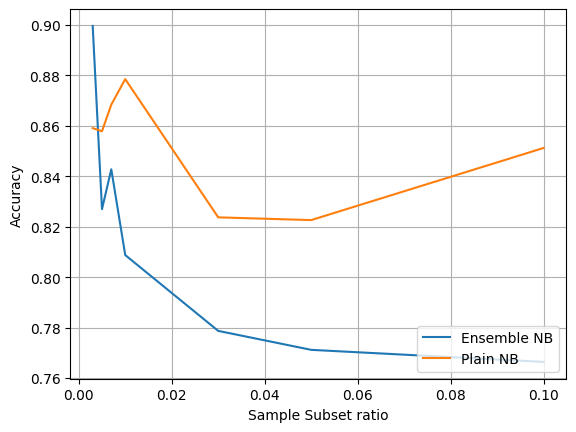

In [ ]:
# Plot
ratios = [0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.1]
plt.plot(ratios, accNB, label="Ensemble NB")
plt.plot(ratios, accRNB, label="Plain NB")
plt.xlabel("Sample Subset ratio")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid()
plt.show()

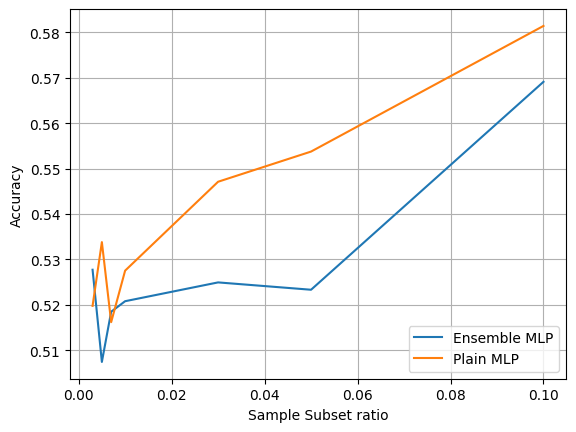

In [ ]:
# Plot
plt.plot(ratios, accMLP, label="Ensemble MLP")
plt.plot(ratios, accRMLP, label="Plain MLP")
plt.xlabel("Sample Subset ratio")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid()
plt.show()

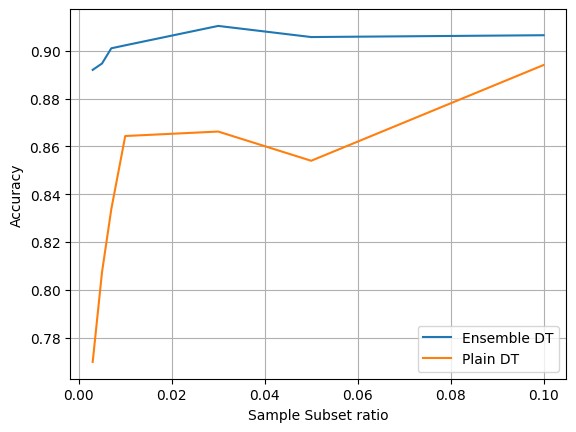

In [ ]:
# Plot
plt.plot(ratios, accDT, label="Ensemble DT")
plt.plot(ratios, accRDT, label="Plain DT")
plt.xlabel("Sample Subset ratio")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid()
plt.show()

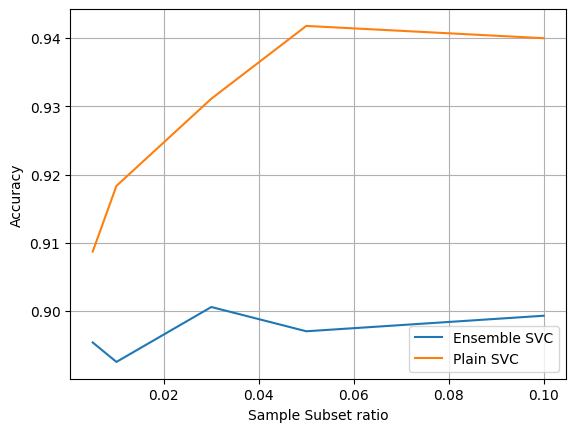

In [ ]:
# Plot
ratios = [0.005, 0.01, 0.03, 0.05, 0.1]
plt.plot(ratios, accSVC, label="Ensemble SVC")
plt.plot(ratios, accRSVC, label="Plain SVC")
plt.xlabel("Sample Subset ratio")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid()
plt.show()

With the Naive Bayes, Neural Network, and SVC classifiers I the regular classifier performed better than the ensemble when running with subests of the data and all of the features. This was unexpected since the lecture showed the opposite. This may be because I restricted the number of samples instead of the number of features and always used all of the features. 

The Naive Bayes did start to trend upward but increasing the number of samples would increase the runtime significantly. The Neural network performed the worst out the the different classifiers, even with the regular one being well below the other classifiers. 

The SVC classifier performed the best overall with the regular classifier outperforming the ensemble. It did take significant time to run and wouldn't run with samples restricted too far. It also took the longest time by far without much better performance than decision tree which ran really fast and had excellent results.

The decision tree ensemble outperformed the regular classifier, which is expected, since the ensemble makes it into a random forest which has always shown great results so far.

I also tried ranking and removing what seemed like unnecessary features but that made all of the classifiers perform worse so I left all of the features intact. Overall, the decision tree ensemble is the most impressive since it runs very fast and has great accuracy. 

I was interseting to see that with large datasets it becomes very difficult to use all of the data for to train classifiers and a good selection criteria is necessary to get results in a reasonable amount of time. 